In [1]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import mlxtend
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [14]:
width_shape = 224
height_shape = 224
batch_size = 32 

names = ['MALIGNANTMASSES', 'CALC', 'BENIGNMASSES', 'NORM']
test_data_directory = r"C:\Users\hp\Documents\CursoML\processed\Testing"

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

cancer_model= load_model("model_tesis.h5")

Found 312 images belonging to 4 classes.


In [15]:
predictions = cancer_model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

C:\Users\hp\AppData\Local\Temp/ipykernel_16400/2704713775.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = cancer_model.predict_generator(generator=test_generator)


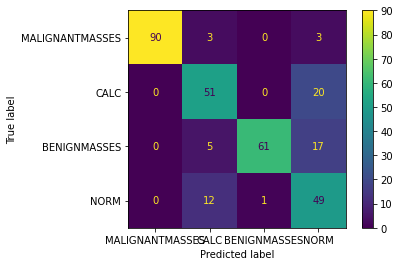

In [16]:
#matc=confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_real, y_pred),
                              display_labels=names)
disp.plot()
plt.show()



In [17]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.9375    0.9677        96
           1     0.7183    0.7183    0.7183        71
           2     0.9839    0.7349    0.8414        83
           3     0.5506    0.7903    0.6490        62

    accuracy                         0.8045       312
   macro avg     0.8132    0.7953    0.7941       312
weighted avg     0.8423    0.8045    0.8140       312



In [19]:
precision_score(y_real, y_pred, average='weighted')

0.8422952621258167

In [20]:
accuracy_score(y_real, y_pred,normalize=False)

251

In [23]:
recall_score(y_real, y_pred, average='weighted')

0.8044871794871795